# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

# Algumas configurações para o matplotlib.

## _Setup_ geral

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [4]:
countries = pd.read_csv("countries.csv")

In [5]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

#### Temos 2 variáveis categóricas, as quais são as duas primeiras colunas e 18 variáveis numéricas, todas à direita 

In [6]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density          object
Coastline_ratio      object
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones_per_1000      object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

In [7]:
#Convertiz tudo para string primeiro, porque ele dizia que os object eram float64
countries = countries.astype(str)
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           227 non-null    object
 1   Region            227 non-null    object
 2   Population        227 non-null    object
 3   Area              227 non-null    object
 4   Pop_density       227 non-null    object
 5   Coastline_ratio   227 non-null    object
 6   Net_migration     227 non-null    object
 7   Infant_mortality  227 non-null    object
 8   GDP               227 non-null    object
 9   Literacy          227 non-null    object
 10  Phones_per_1000   227 non-null    object
 11  Arable            227 non-null    object
 12  Crops             227 non-null    object
 13  Other             227 non-null    object
 14  Climate           227 non-null    object
 15  Birthrate         227 non-null    object
 16  Deathrate         227 non-null    object
 17  Agriculture     

In [8]:
float_columns = list(countries) 
del float_columns[0:4]

In [9]:
float_columns

['Pop_density',
 'Coastline_ratio',
 'Net_migration',
 'Infant_mortality',
 'GDP',
 'Literacy',
 'Phones_per_1000',
 'Arable',
 'Crops',
 'Other',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [10]:
for col in float_columns:
    countries[col] = countries[col].str.replace(',','.').astype(float)

In [11]:
for col in ['Population','Area']:
    countries[col] = countries[col].astype(int)

In [12]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

In [13]:
countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Retirar os espaços das features Country e Region

In [14]:
countries_ = countries

In [15]:
countries_['Country'] = countries_['Country'].str.strip()
countries_['Region'] = countries['Region'].str.strip()

### Base com retirada dos espaços e substituição das vírgulas por pontos:

In [16]:
countries_.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Inicia sua análise a partir daqui

In [17]:
# Sua análise começa aqui.


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [18]:
region_list = list(countries_.Region.unique())

In [20]:
region_list.sort()

In [21]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return region_list
    

q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

In [22]:
type(q1())

list

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

In [24]:
#Diferença entre chamar com ponto . e com [['']]:

# O 'Discretizer' pede dimensão 2

In [25]:
countries_['Pop_density']

0       48.0
1      124.6
2       13.8
3      290.4
4      152.1
       ...  
222    419.9
223      1.0
224     40.6
225     15.3
226     31.3
Name: Pop_density, Length: 227, dtype: float64

In [26]:
countries_.Pop_density.shape

(227,)

In [27]:
countries_[['Pop_density']].shape

(227, 1)

In [28]:
discretizer = KBinsDiscretizer(n_bins=10, encode = 'ordinal', strategy='quantile')

discretizer.fit(countries_[['Pop_density']])

Pop_density_bins = pd.DataFrame(discretizer.transform(countries_[['Pop_density']]), columns = ['Pop_density_bins'])

In [29]:
countries_ = pd.concat([countries_, Pop_density_bins], axis = 1)

In [30]:
#Desta maneira consigo retornar o valor do índice, utilizando [] para referenciar, como está presente na resposta da questão
countries_.Pop_density_bins.value_counts().index

Float64Index([9.0, 5.0, 0.0, 8.0, 1.0, 6.0, 3.0, 4.0, 2.0, 7.0], dtype='float64')

In [31]:
def q2():
    return countries_.Pop_density_bins.value_counts()[9]# Retorne aqui o resultado da questão 2.
    pass
q2()

23

In [32]:
type(q2())

numpy.int64

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [33]:
#Nuḿero de categorias (se missing)
climate_attr = countries_.Climate.nunique(); climate_attr

6

In [34]:
#Missing também seria uma categoria? 
countries_[['Climate']].isna().sum().sum()

22

In [35]:
#Adicionando a categoria missing
climate_attr = climate_attr + 1; climate_attr

7

In [36]:
countries_.Region.nunique()

11

In [37]:
#Número de categorias da Region
region_attr = countries_.Region.nunique(); region_attr

11

In [38]:
#Há missing em Region? não, então não será adicionada nova categoria
countries_[['Region']].isna().sum().sum()

0

In [39]:
from sklearn.preprocessing import OneHotEncoder
countries_['Climate'].fillna(0, inplace = True)
one_hot_encoder = OneHotEncoder(sparse=False, dtype = np.int)
encoded_region_climate = one_hot_encoder.fit_transform(countries_[['Climate','Region']])

In [40]:
#Sâo portanto 18 novos atributos, como indicava a análise anterior
encoded_region_climate.shape

(227, 18)

In [41]:
a3 = np.int(encoded_region_climate.shape[1])

In [42]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return a3

In [43]:
q3()

18

In [44]:
type(q3())

int

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

### Criação do pipeline

In [46]:
pipeline = Pipeline(steps = [
    ('SimpleImputer', SimpleImputer(strategy = 'median')),
    ('StandardScaler', StandardScaler())
])

Aplicação do pipeline:

In [47]:
pipe_float = pipeline.fit_transform(countries_.iloc[:,list(range(2,20))]); pipe_float

array([[ 0.01969468,  0.02758332, -0.19984434, ...,  1.63657562,
        -0.31540576, -1.1611354 ],
       [-0.21387688, -0.31879748, -0.15360296, ...,  0.59516349,
        -0.70631815,  0.08342432],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.32662697,
         2.39091078, -1.67396905],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.08738364,
         1.4286649 , -1.0798325 ],
       [-0.14654488,  0.08642673, -0.21958445, ...,  0.51072467,
         0.06047154, -0.47944188],
       [-0.14029829, -0.11624192, -0.20992568, ...,  0.22222537,
        -0.29285312,  0.08342432]])

In [48]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

Tratamento para poder aplicar o transform na nova observação test_country:

In [49]:
df_test_country = pd.DataFrame(test_country).T; df_test_country

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.0442173,-0.275281,0.132559,-0.805485,1.01198,0.618918,1.00749,0.202399,-0.0436787,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


Voltar os nomes das colunas:

In [50]:
df_test_country.columns = list(countries); df_test_country

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.0442173,-0.275281,0.132559,-0.805485,1.01198,0.618918,1.00749,0.202399,-0.0436787,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


Aplicar o transform do pipeline que foi criado com o fit na base completa:

In [51]:
test_country_pipe = pipeline.transform(df_test_country.drop(columns = ['Country','Region'], axis = 1))

Facilitar visualização com um dataframe, de modo a visualizar rapidamente qual é a variável Arable

In [52]:
df_test_country_pipe = pd.DataFrame(test_country_pipe, columns = list(countries.drop(columns = ['Country','Region'], axis = 1)))
df_test_country_pipe

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-0.244325,-0.334891,-0.228847,-0.29726,0.019591,-1.028617,-0.966233,-4.354272,-1.03721,-1.046857,-0.550581,-5.101122,-0.67139,-2.024552,-1.990921,-7.04915,-0.139155,0.034903


In [53]:
def q4():
    return round(df_test_country_pipe.loc[0,'Arable'], 3)
    # Retorne aqui o resultado da questão 4.
    pass

q4()

-1.047

In [54]:
type(q4())

numpy.float64

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

### Visualização de outliers através do boxplot

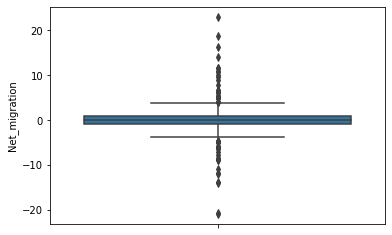

In [55]:
sns.boxplot(countries_.Net_migration, orient = 'vertical')

### Visualização de outliers através de histograma

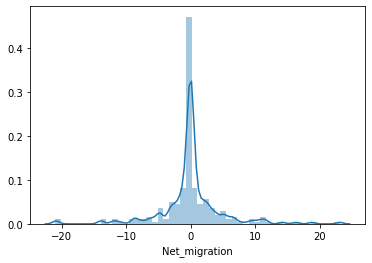

In [56]:
sns.distplot(countries_.Net_migration)

Visualização dos 5 primeiros países com maior net migration 

In [57]:
countries_.sort_values(by=['Net_migration'], ascending = False).head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Pop_density_bins
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,3.0
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,...,3.85,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954,7.0
166,Qatar,NEAR EAST,885359,11437,77.4,4.92,16.29,18.61,21500.0,82.5,...,1.64,0.27,98.09,1.0,15.56,4.72,0.002,0.801,0.197,4.0
111,Kuwait,NEAR EAST,2418393,17820,135.7,2.80,14.18,9.95,19000.0,83.5,...,0.73,0.11,99.16,1.0,21.94,2.41,0.004,0.479,0.516,6.0
208,Turks & Caicos Is,LATIN AMER. & CARIB,21152,430,49.2,90.47,11.68,15.67,9600.0,98.0,...,2.33,0.00,97.67,2.0,21.84,4.21,NaN,NaN,NaN,3.0


Visualização dos 5 países com menor Net Migration

In [58]:
countries_.sort_values(by = ['Net_migration'], ascending = True).head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Pop_density_bins
136,"Micronesia, Fed. St.",OCEANIA,108004,702,153.9,870.66,-20.99,30.21,2000.0,89.0,...,5.71,45.71,48.58,2.0,24.68,4.75,0.289,0.152,0.559,7.0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,8.0
81,Grenada,LATIN AMER. & CARIB,89703,344,260.8,35.17,-13.92,14.62,5000.0,98.0,...,5.88,29.41,64.71,2.0,22.08,6.88,0.054,0.180,0.766,8.0
56,Dominica,LATIN AMER. & CARIB,68910,754,91.4,19.63,-13.87,14.15,5400.0,94.0,...,6.67,20.00,73.33,2.0,15.27,6.73,0.177,0.328,0.495,5.0
37,Cape Verde,SUB-SAHARAN AFRICA,420979,4033,104.4,23.93,-12.07,47.77,1400.0,76.6,...,9.68,0.50,89.82,3.0,24.87,6.55,0.121,0.219,0.660,5.0


### Não deve-se remover estes outliers, eles são dados reais que indicam as taxas de Imigração de um país.
### Os outliers só indicam que os países com valores acima de 15 por exemplo são países que entram muito mais pessoas do que saem e vice-versa para aqueles com valores abaixo de -15 aproximadamente

In [59]:
#NÃO denominei o quant1 e quant3 de q1 e q3, porque na hora de submeter o resultado do desafio, iria dar conflito e erro com a função q1() e q3()
quant1 = countries_.Net_migration.quantile(0.25)
quant3 = countries_.Net_migration.quantile(0.75)
iqr = quant3-quant1

outlier_limits = [quant1-1.5*iqr, quant3+1.5*iqr]

outliers_inferior = countries_[countries_['Net_migration'] < outlier_limits[0]]
outliers_superior = countries_[countries_['Net_migration'] > outlier_limits[1]]


In [60]:
def q5():
    return (outliers_inferior.shape[0], outliers_superior.shape[0], False)
    # Retorne aqui o resultado da questão 4.
    pass

q5()

(24, 26, False)

In [61]:
type(q5())

tuple

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [62]:
from sklearn.datasets import fetch_20newsgroups

In [63]:
#Definição das bibliotecas de documentos para importar:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']

In [64]:
#Carregando o subset de treino? (mas não era para carregar o de teste?)
#selecionando as categorias
#"Embaralhando" os documentos do corpus com random_state= 42 

newsgroups = fetch_20newsgroups(subset = 'train', 
                               categories = categories,
                               shuffle = True,
                               random_state = 42)

### Aplicar o Count Vectorizer para descobrir quantas vezes a palavra j aparece no documento i 

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
count_vectorizer = CountVectorizer()
newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)

In [67]:
#Passando para dataframe:
df_newsgroups_vectorizer = pd.DataFrame(newsgroups_counts.toarray(), columns= count_vectorizer.get_feature_names())
df_newsgroups_vectorizer
                                       

,00,000,0000,0000000004,0000000005,0000000667,0000001200,000005102000,0001,000100255pixel,...,zyeh,zygot,zyxel,zz,zzr11,zzr1100,zzzzzz,ªl,³ation,ýé
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#Contabilizar o número de vezes que aparece a palavra phone

In [69]:
def q6():
    return df_newsgroups_vectorizer['phone'].sum()
    # Retorne aqui o resultado da questão 4.
    pass

q6()

213

In [70]:
type(q6())

numpy.int64

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(newsgroups.data)

newsgroups_tfidf_vectorized = tfidf_vectorizer.transform(newsgroups.data)

In [73]:
df_newsgroups_tfidf_vectorized = pd.DataFrame(newsgroups_tfidf_vectorized.toarray(),
                                              columns = tfidf_vectorizer.get_feature_names())

In [74]:
df_newsgroups_tfidf_vectorized

,00,000,0000,0000000004,0000000005,0000000667,0000001200,000005102000,0001,000100255pixel,...,zyeh,zygot,zyxel,zz,zzr11,zzr1100,zzzzzz,ªl,³ation,ýé
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.038791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1769,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1770,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1771,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
def q7():
    return round(df_newsgroups_tfidf_vectorized['phone'].sum(),3)
    # Retorne aqui o resultado da questão 4.
    pass

q7()

8.888

In [76]:
type(q7())

numpy.float64

## Qual o maior tfidf?

In [77]:
tfidf_todas = [df_newsgroups_tfidf_vectorized.iloc[:,i].sum() for i in list(range(0,df_newsgroups_tfidf_vectorized.shape[1]))]

In [78]:
names = tfidf_vectorizer.get_feature_names()

In [79]:
len(names)

27335

In [80]:
len(tfidf_todas)

27335

In [81]:
df_tfidf_importance = pd.DataFrame({'Palavras': names, 'Tfidf': tfidf_todas})

In [82]:
df_tfidf_importance.sort_values(by='Tfidf', ascending = False).head(10)

,Palavras,Tfidf
24447,the,159.222010
24706,to,94.817501
18238,of,79.576625
4525,and,71.229380
13819,in,64.569538
14410,it,60.838665
14359,is,60.147179
10181,edu,55.754465
27196,you,53.255324
11560,for,52.660130
